In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [22]:
folderdir='/kaggle/input/lions-or-cheetahs-image-classification/images/'
train_cheetah=folderdir + "Cheetahs/"
train_lion=folderdir+"Lions/"
test_cheetah=folderdir + "Cheetahs/"
test_lion=folderdir+"Lions/"

In [23]:
cheetah_train=[]
cheetah_label=np.zeros(len(os.listdir(train_cheetah)))
for file_name in os.listdir(train_cheetah):
    imgPath=train_cheetah+file_name
    img=cv2.imread(imgPath)
    img=cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
    img=img/255
    cheetah_train.append(img)

In [24]:
lion_train=[]
lion_label=np.zeros(len(os.listdir(train_lion)))
for file_name in os.listdir(train_lion):
    imgPath=train_lion+file_name
    img=cv2.imread(imgPath)
    img=cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
    img=img/255
    lion_train.append(img)

In [25]:
cheetah_test=[]
lion_test=[]
cheetahLabelTest=np.zeros(len(os.listdir(test_cheetah)))
lionLabelTest=np.zeros(len(os.listdir(test_lion)))

In [26]:
def dataCons(listimg,direk,lbl):
    for fName in tqdm(os.listdir(direk)):
        img_path=direk+fName
        img=cv2.imread(img_path)
        img=cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
        img=img/255
        listimg.append(img)
    return listimg
    

In [27]:
dataCons(cheetah_test,test_cheetah,cheetahLabelTest)
dataCons(lion_test,test_lion,lionLabelTest)

100%|██████████| 100/100 [00:02<00:00, 43.82it/s]


[array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.40392157, 0.46666667, 0.48235294],
         [0.37647059, 0.45882353, 0.47058824],
         [0.38039216, 0.45882353, 0.47058824]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.41960784, 0.4745098 , 0.49803922],
         [0.38039216, 0.45098039, 0.47058824],
         [0.37254902, 0.44313725, 0.4627451 ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.39215686, 0.45882353, 0.47843137],
         [0.36470588, 0.43529412, 0.44705882],
         [0.36470588, 0.42352941, 0.41960784]],
 
        ...,
 
        [[0.12156863, 0.11764706, 0.37647059],
         [0.1254902 , 0.11764706, 0.38039

Text(0.5, 1.0, 'Normal')

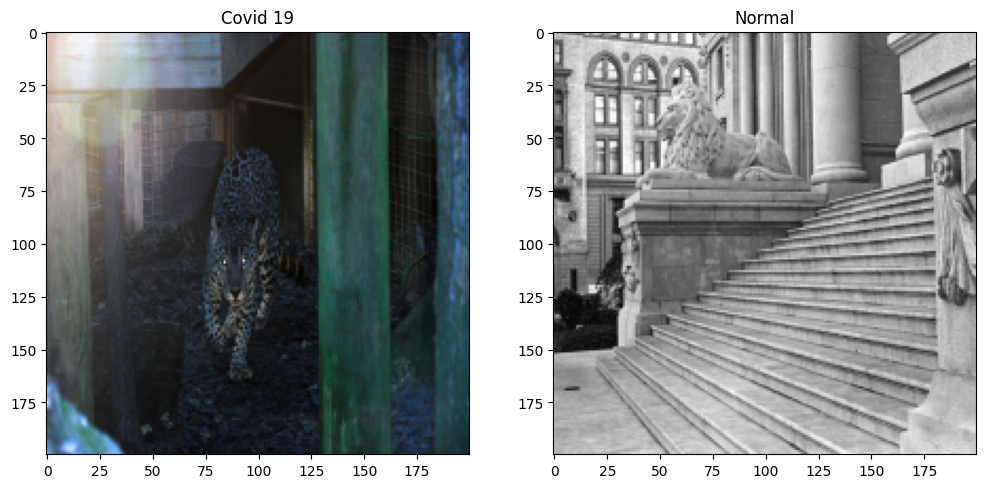

In [28]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(cheetah_train[17])
ax[0].set_title('Covid 19')

ax[1].imshow(lion_train[20])
ax[1].set_title('Normal')

In [29]:
#gabungkan semua data dari masing masing kelas
X_train=np.concatenate((cheetah_train,lion_train))
y_train=np.concatenate((cheetah_label,lion_label))

X_test=np.concatenate((cheetah_test,lion_test))
y_test=np.concatenate((cheetahLabelTest,lionLabelTest))

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [31]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

In [32]:
model=Sequential()
#Convolutional Layer
model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(200,200,3)))
model.add(MaxPool2D(pool_size=(2,2)))#input

model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(200,200,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [33]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [34]:
history=model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
6/6 [==============================] - 6s 898ms/step - loss: 0.1811 - accuracy: 0.9333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
6/6 [==============================] - 5s 755ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 5s 758ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 5s 757ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 5s 759ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 5s 763ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 5s 761ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [35]:
y_pred=model.predict(X_test)#masih dalam bentuk peluang

7/7 [==============================] - 1s 149ms/step


In [36]:
prediction=np.argmax(y_pred,axis=1)#dalam bentuk akhir
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

